 # #EDA (Exploratory Data Analysis)
We will be using matplotlib, seaborn for visualization
For mathematical and statisticla functions, we will be using numpy and pandas

In [5]:
import numpy as np  # matmatical computation
import pandas as pd  # data preprocessing
import matplotlib.pyplot as plt  # visualization
import seaborn as sns  # visualization

In [8]:
df = pd.read_csv('Global_SuperStore.csv',encoding='latin1')
# ,encoding='latin1'
df.head()# top 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [9]:
df.shape
# num of rows = 51290, num of cols = 24

(51290, 24)

### A) Data Preprocesing

#### 1)Check Null values

In [10]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [11]:
# df['Postal Code']
print(f'Postal Code coantians {41296*100/51290} % of null values')

Postal Code coantians 80.51472021836615 % of null values


In [12]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#Inference
 
We can drop this column as it contains more than 80% null values

In [14]:
df.drop('Postal Code',axis=1,inplace=True)  # axis=1 => column
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

#### 2) Check Data Types

In [15]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

###### Inference
We have to convert datatype into datetime columns 'Order Date', 'Ship Date'

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\SANJAY KUMAR\AppData\Local\Temp\ipykernel_9064\3072535395.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [17]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

C:\Users\SANJAY KUMAR\AppData\Local\Temp\ipykernel_9064\3346622317.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

#### 3) Check duplicates

In [19]:
df.duplicated().sum()

0

#### 4) Extract all categorical columns and numerical columns

In [20]:
cat_cols = df.select_dtypes(include='object')
print(cat_cols.columns)
num_cols = df.select_dtypes(exclude='object')
print(num_cols.columns)

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')
Index(['Row ID', 'Order Date', 'Ship Date', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost'],
      dtype='object')


### B) Uni-variate EDA
Statistical or visual analysis of a single column (one variable

###### 1) Find Value counts of categroical columns namely Category, Segment, Sub-Category, Region, Ship Mode and Market. Depict the following
a) Catgeory count on a bar chart(matplotlib)

In [21]:
cat_cols

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,CA-2012-124891,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,Critical
1,IN-2013-77878,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,IN-2013-71249,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",Medium
3,ES-2013-1579342,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",Medium
4,SG-2013-4320,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,IN-2014-62366,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",Medium
51286,US-2014-102288,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,Medium
51287,US-2013-155768,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",High
51288,MX-2012-140767,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",Medium


In [22]:
a1 = df['Category'].value_counts()
a1

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

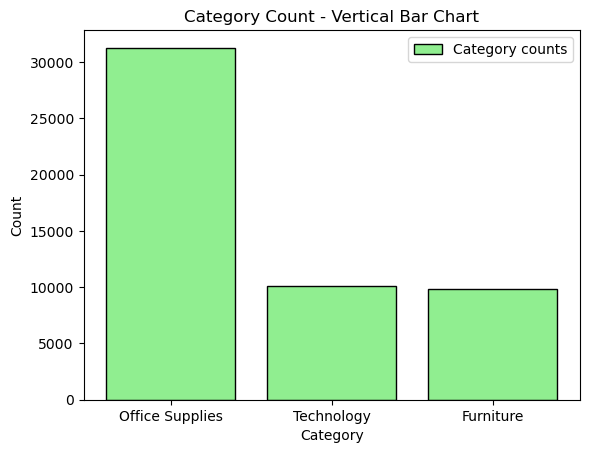

In [23]:
plt.bar(a1.index,a1.values,color='lightgreen',edgecolor='black',label='Category counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count - Vertical Bar Chart')
plt.legend()
plt.show()

###### Inference:
Office Supplies with the highest count among the categories, it appears that office supplies are in high demand There is lil difference between the demand of Technology and Furniture

b) Sub-category on a horizontal bar chart(matplotlib

In [24]:
a2 = df['Sub-Category'].value_counts()
a2

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

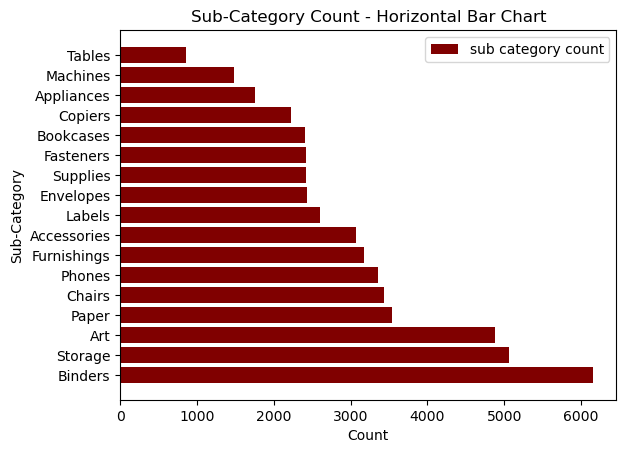

In [25]:
plt.barh(a2.index,a2.values,color='maroon',label='sub category count')
plt.ylabel('Sub-Category')
plt.xlabel('Count')
plt.title('Sub-Category Count - Horizontal Bar Chart')
plt.legend()
plt.show()

###### Infrences:
The sub-category data reveals a varied product offering. Binders, Storage, and Art have notably high counts,
suggesting organizational and creative products are popular. Furniture items like Chairs and Furnishings also
have significant representation. Technology-oriented products like Phones and Accessories, along with Paper and
Labels, indicate a diverse range. The dataset emphasizes a balance between organizational, technological, and 
artistic products, with potential demand for office furniture and technology-related items.

c) Segment on a Pie Chart(matplotlib)

In [26]:
a3 = df['Segment'].value_counts()
a3

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

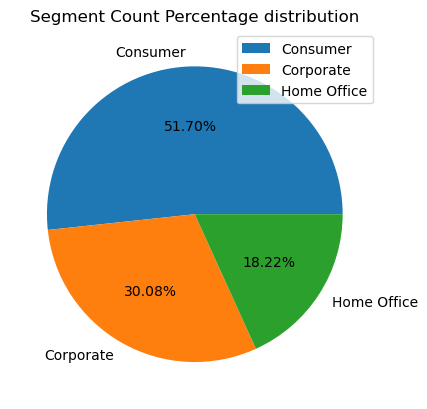

In [27]:
plt.pie(a3.values,labels=a3.index,autopct='%.2f%%')
plt.title('Segment Count Percentage distribution')
plt.legend()
plt.show()

The segment data highlights diverse customer types. The Consumer segment holds the highest count, indicating 
a significant focus on individual customers or retail consumers. The Corporate segment also shows substantial 
representation, suggesting business-to-business (B2B) interactions or corporate clients are important. 
The Home Office segment, while having a lower count, still represents a notable portion, potentially reflecting 
a focus on smaller businesses and remote workers. This dataset showcases a customer-oriented approach with attention 
to both individual consumers and corporate clients.

d) Region on a bar chart(seaborn)

In [29]:
a4 = df['Region'].value_counts()
print(type(a4)) # Series
a4

<class 'pandas.core.series.Series'>


Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

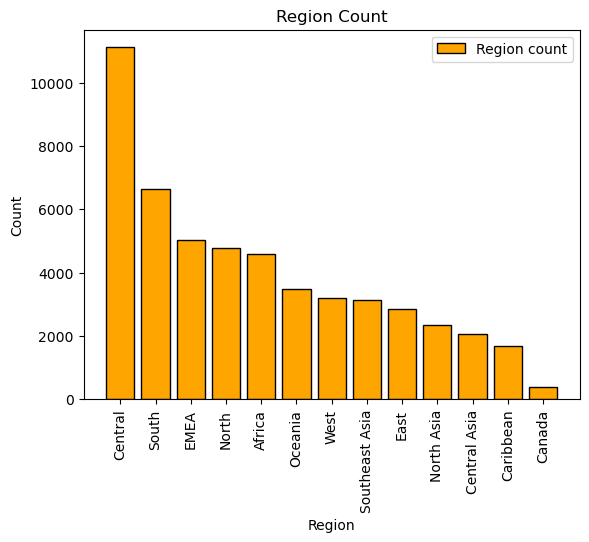

In [30]:
plt.bar(a4.index,a4.values,color='orange',edgecolor='black',label='Region count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Count')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Central and South regions have notably higher counts, suggesting significant business activities in these areas. EMEA (Europe, Middle East, and Africa) and North regions also show substantial presence. Less frequent mentions of Oceania, Caribbean, and Canada indicate a comparatively smaller focus on these regions. The dataset likely encompasses a global business scope, with a focus on Central and South regions, as well as broader coverage in EMEA and North regions

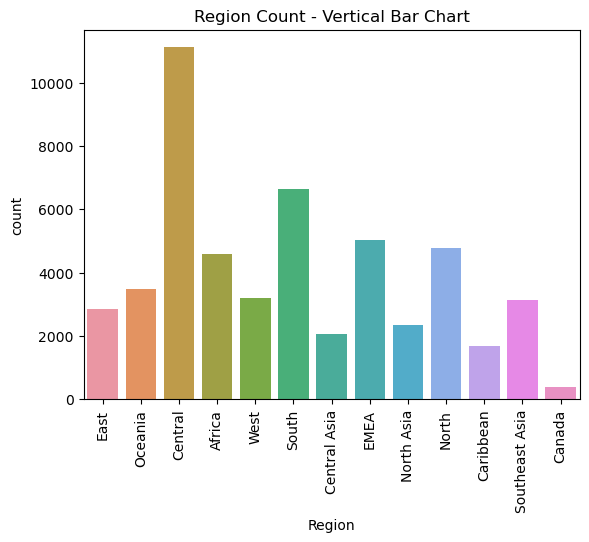

In [31]:
sns.countplot(x= df['Region'])
plt.title('Region Count - Vertical Bar Chart')
plt.xticks(rotation=90)
plt.show()

e) Ship Mode on a line chart(matplotlib)

In [32]:
a5 = df['Ship Mode'].value_counts()
a5

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

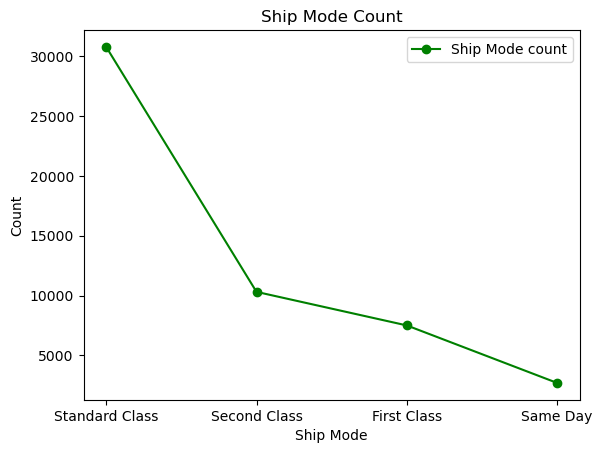

In [33]:
plt.plot(a5.index,a5.values,color='green',marker='o',label='Ship Mode count')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.title('Ship Mode Count')
plt.legend()
plt.show()

Standard Class is the most commonly used mode, indicating a preference for cost-effective shipping. Second Class and First Class also see substantial use, suggesting a mix of faster and more premium options. Same Day, with a lower count, reflects a preference for urgent delivery. Overall, the dataset reveals a balanced shipping approach, with an emphasis on cost-efficient and timely options like Standard and Second Class.

f) Market on a Area chart(matplotlib)

In [34]:
a6 = df['Market'].value_counts()
a6

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

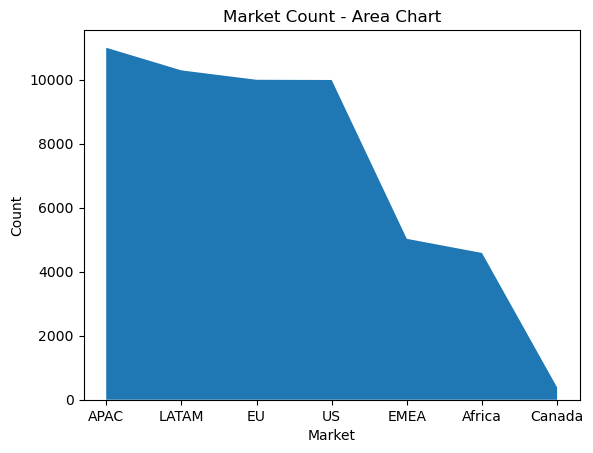

In [35]:
plt.stackplot(a6.index,a6.values)
plt.xlabel('Market')
plt.ylabel('Count')
plt.title('Market Count - Area Chart')
plt.show()

The market data indicates a global presence, with significant activity in various regions. APAC and LATAM show strong market representation, suggesting a focus on Asia-Pacific and Latin American regions. The EU and US markets are equally substantial, reflecting well-established markets. EMEA and Africa have notable but comparatively lower counts, while Canada exhibits a smaller market share. This dataset suggests a diversified global market strategy, with APAC and LATAM standing out as key regions of interest

#### 2) Plot the following
Kdeplot/displot for Quantity

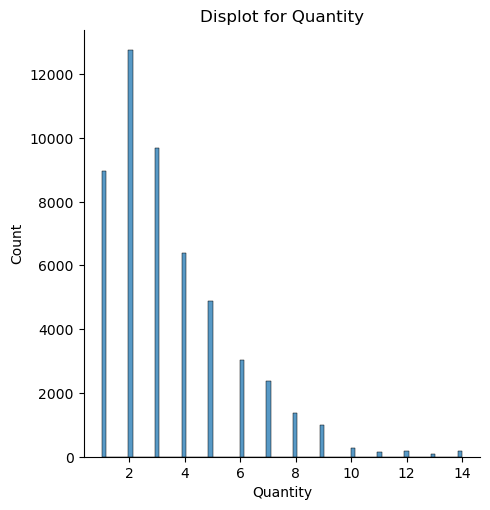

In [36]:
sns.displot(x=df['Quantity'])
plt.title('Displot for Quantity')
plt.show()

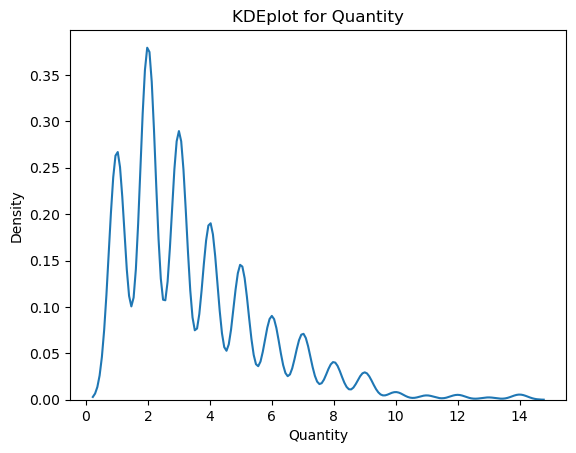

In [37]:
sns.kdeplot(x=df['Quantity'])
plt.title('KDEplot for Quantity')
plt.show()

#### C) Bivariate Analysis
Statistical or Visual Analysis of 2 variables

###### 1) Depict the following on a Scatter plot
a) Sales vs Profit

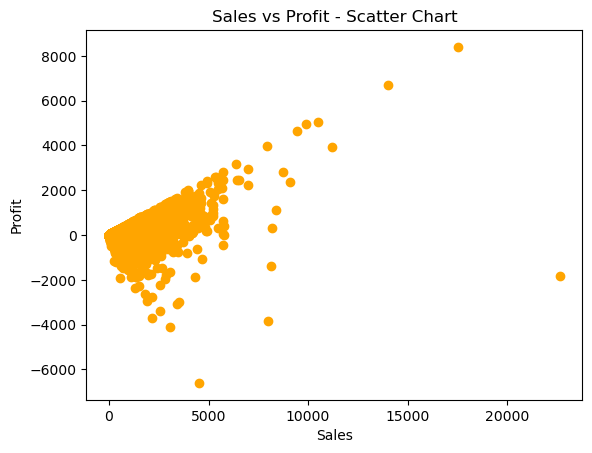

In [38]:
plt.scatter(df['Sales'],df['Profit'],color='orange')
plt.title('Sales vs Profit - Scatter Chart')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

###### Infrences:
There is a positive correlation between Sales and value of profit, it means both the variables are changes in the same direction. When sales keeps increasing then profit keeps increasing too.
When sales increases then the profit also increases and vice versa.
We can also observe an outlier point, which are much higher or much lower values.

##### 2) Depict Boxplot for the following
a) Quantity based on Segmen

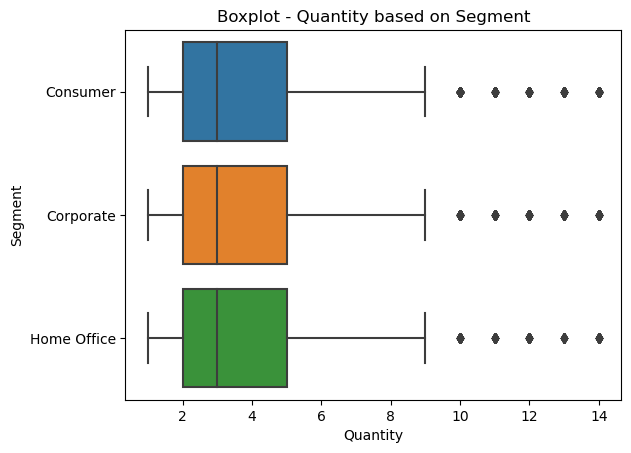

In [39]:
sns.boxplot(x=df['Quantity'],y=df['Segment'])
plt.title('Boxplot - Quantity based on Segment')
plt.show()

###### Infrence:
We have outlier in Quantity based of Segment

b) Discount based on Ship Mode

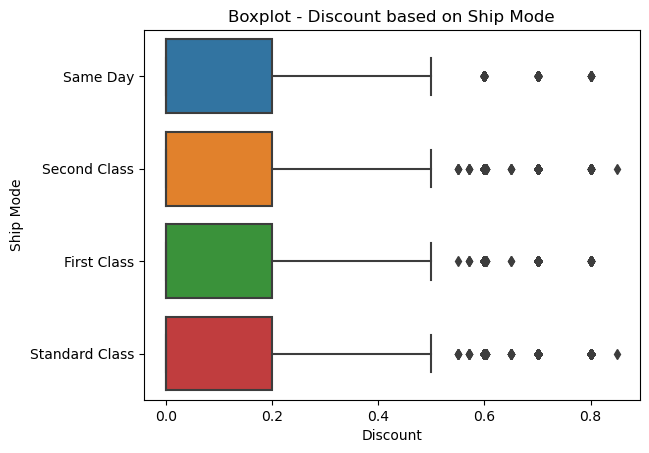

In [40]:
sns.boxplot(x=df['Discount'],y=df['Ship Mode'])
plt.title('Boxplot - Discount based on Ship Mode')
plt.show()

###### Infrence:
We have outlier in Discount based of Ship mode

#### Plot pairplot for the categorical variables including ['Sales','Profit','Quantity','Discount']

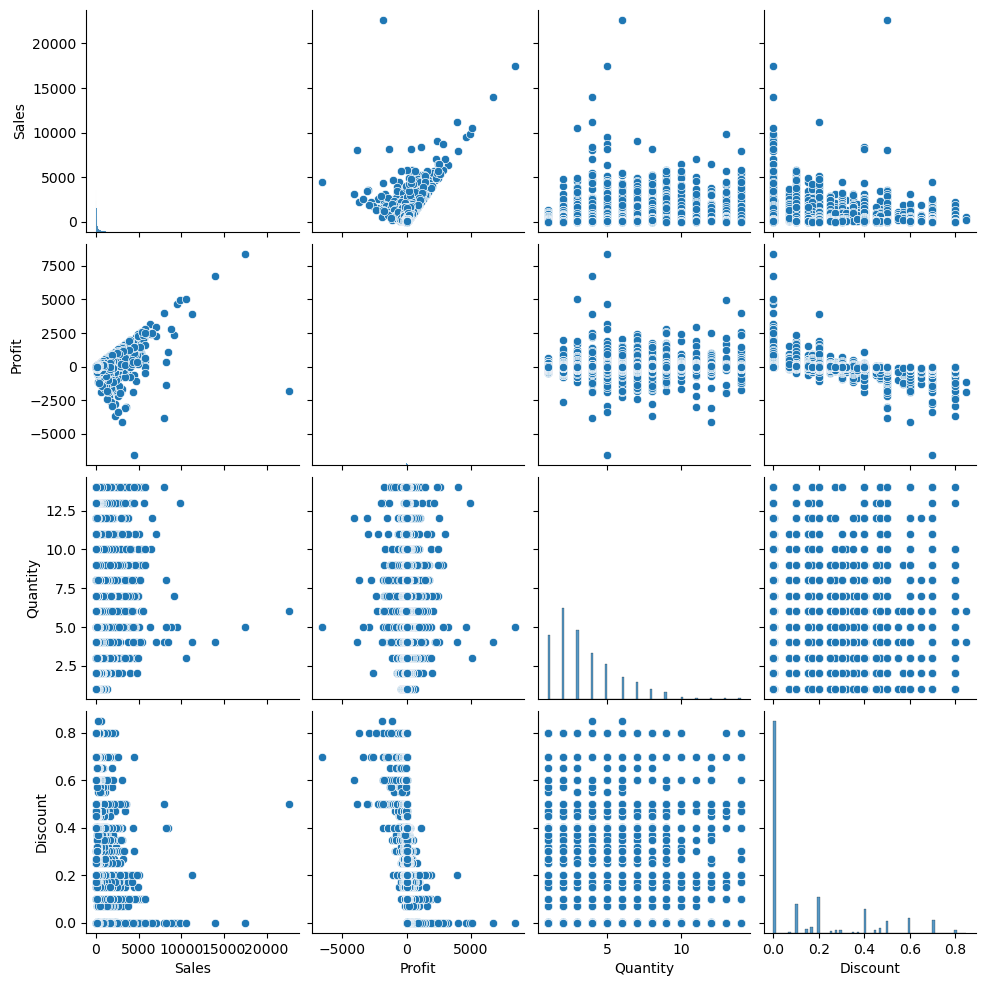

In [42]:
sns.pairplot(df,vars=['Sales','Profit','Quantity','Discount'])
plt.show()

#### Depict Correlation on a heatmap

In [44]:
# numerical columns
#df1 = df.loc[:,['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', ]]
corr = num_cols.corr()
corr

C:\Users\SANJAY KUMAR\AppData\Local\Temp\ipykernel_9064\2937378163.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = num_cols.corr()


,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,-0.043889,-0.173483,0.087594,-0.019037,-0.039076
Sales,-0.043889,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,-0.019037,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039076,0.768073,0.272649,-0.079055,0.354441,1.000000


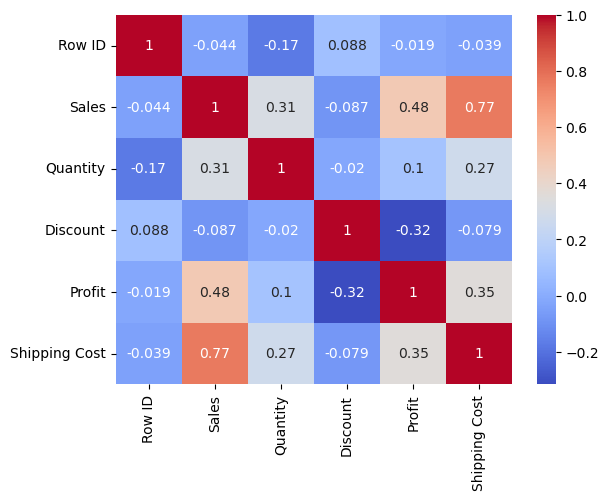

In [45]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### D) Group by Operations based EDA

#### 1) Find Sub Category wise sum of Sales and depict it on a bar chart and depict highest and lowest shipping cost with different colors.

In [46]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [47]:
b1 = df.groupby(['Sub-Category'])['Sales'].sum()
b1

Sub-Category
Accessories    7.492370e+05
Appliances     1.011064e+06
Art            3.720920e+05
Binders        4.619115e+05
Bookcases      1.466572e+06
Chairs         1.501682e+06
Copiers        1.509436e+06
Envelopes      1.709043e+05
Fasteners      8.324232e+04
Furnishings    3.855783e+05
Labels         7.340403e+04
Machines       7.790601e+05
Paper          2.442917e+05
Phones         1.706824e+06
Storage        1.127086e+06
Supplies       2.430742e+05
Tables         7.570419e+05
Name: Sales, dtype: float64

In [48]:
sc =  b1.index.tolist()
ssales = b1.values.tolist()
print(sc)
print(ssales)

['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables']
[749237.0185, 1011064.305, 372091.9659, 461911.5057, 1466572.2418, 1501681.7642, 1509436.27328, 170904.3016, 83242.3159, 385578.2559, 73404.03, 779060.0671, 244291.7194, 1706824.1392, 1127085.8614, 243074.2206, 757041.9244]


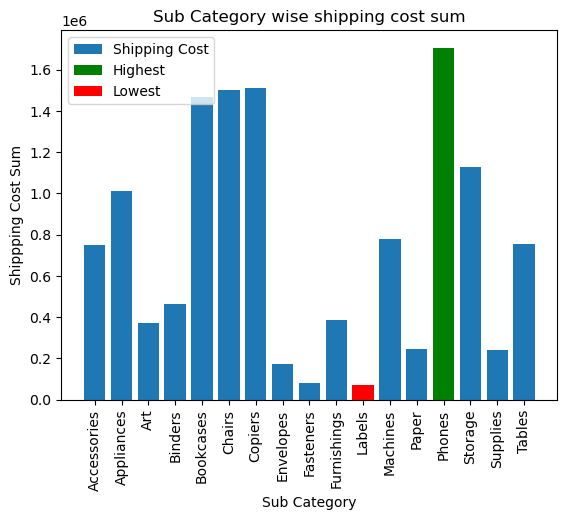

In [49]:
plt.bar(sc,ssales,label='Shipping Cost')
plt.bar(sc[ssales.index(max(ssales))],max(ssales),color='green',label='Highest')
plt.bar(sc[ssales.index(min(ssales))],min(ssales),color='red',label='Lowest')
plt.title('Sub Category wise shipping cost sum')
plt.xlabel('Sub Category')
plt.ylabel('Shippping Cost Sum')
plt.legend(loc=2)
plt.xticks(rotation=90)
plt.show()

#### 2) Find Segment wise mean of Sales and depict it on a pie chart.

In [50]:
b2 = df.groupby(['Segment'])['Sales'].mean()
b2

Segment
Consumer       245.416299
Corporate      247.890176
Home Office    247.228403
Name: Sales, dtype: float64

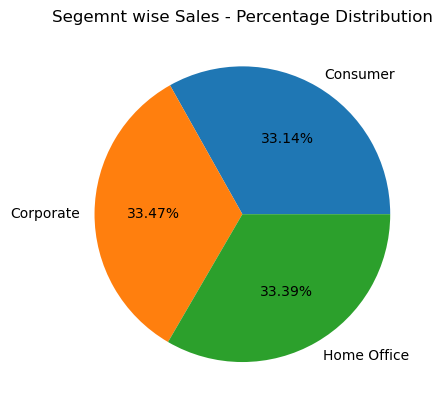

In [51]:
plt.pie(b2.values,labels=b2.index,autopct='%.2f%%')
plt.title('Segemnt wise Sales - Percentage Distribution')
plt.show()

#### 3) Find Segment and Category wise sum of Sales and sum of profit and depict it on a clustered bar chart

In [52]:
b4 = df.groupby(['Segment','Category'])[['Sales','Profit']].sum()
print(type(b4))
b4

<class 'pandas.core.frame.DataFrame'>


Sales        Profit
Segment     Category                                   
Consumer    Furniture        2.128396e+06  153734.39350
            Office Supplies  1.952514e+06  253059.98460
            Technology       2.427040e+06  342445.40396
Corporate   Furniture        1.264520e+06   83731.91800
            Office Supplies  1.142386e+06  167581.22530
            Technology       1.417791e+06  189895.18536
Home Office Furniture        7.179586e+05   47738.41230
            Office Supplies  6.921702e+05   97832.62440
            Technology       8.997261e+05  131438.14386

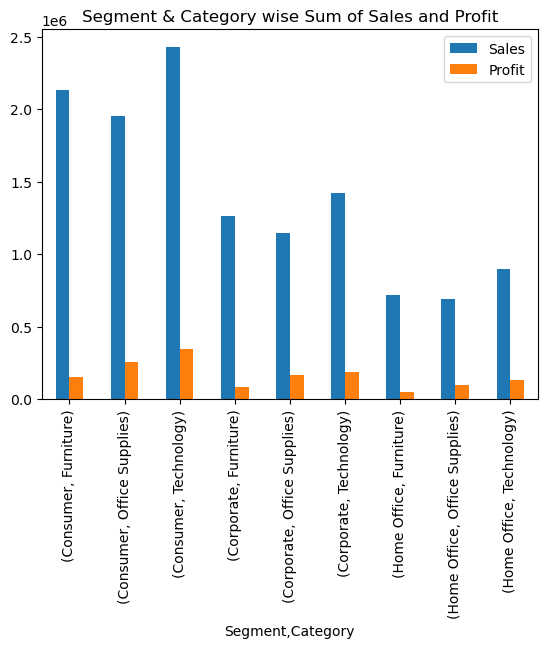

In [53]:
b4.plot(kind='bar')
plt.title('Segment & Category wise Sum of Sales and Profit')
plt.xticks(rotation=90)
plt.show()

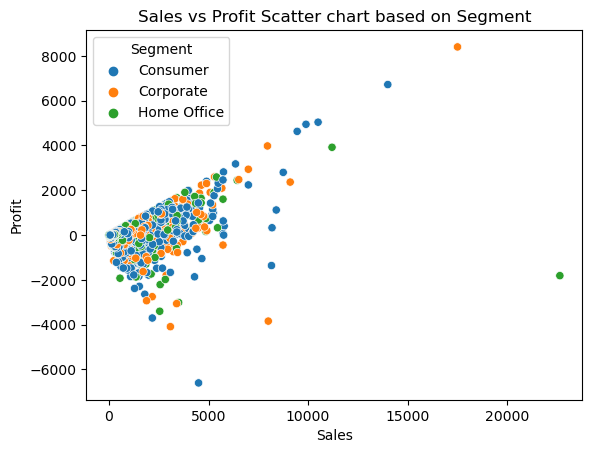

In [54]:
sns.scatterplot(x=df['Sales'],y=df['Profit'],hue=df['Segment'])
plt.title('Sales vs Profit Scatter chart based on Segment')
plt.show()

#### 5) Find sum of Profit and Shipping cost based on Sub Catgeory and display it on a Stacked bar chart

In [55]:
b6 = df.groupby(['Sub-Category'])[['Profit','Shipping Cost']].sum()
b6

,Profit,Shipping Cost
Sub-Category,,
Accessories,129626.30620,83513.3340
Appliances,141680.58940,108300.5860
Art,57953.91090,41287.1420
Binders,72449.84600,48181.7120
Bookcases,161924.41950,155481.9670
Chairs,140396.26750,164229.3520
Copiers,258567.54818,159496.2049
Envelopes,29601.11630,18547.4880
Fasteners,11525.42410,9053.3380


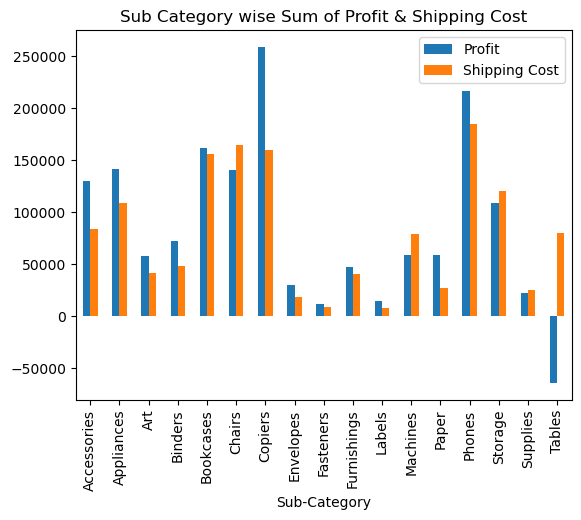

In [56]:
b6.plot(kind='bar')
plt.title('Sub Category wise Sum of Profit & Shipping Cost')
plt.show()

#### E) Creating new Columns

#### 1) Create new columns Year, Quarter, Month and Day based on Order Date

In [57]:
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [58]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [59]:
# dt = datetime
df['Year'] = df['Order Date'].dt.year
df['Qtr'] = df['Order Date'].dt.quarter
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Qtr,Month,Day
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,2309.650,7,0.0,762.1845,933.57,Critical,2012,3,7,31
1,26341,IN-2013-77878,2013-05-02,2013-07-02,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,5,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,5175.171,9,0.1,919.9710,915.49,Medium,2013,4,10,17
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,1,28
4,47221,SG-2013-4320,2013-05-11,2013-06-11,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,2832.960,8,0.0,311.5200,903.04,Critical,2013,2,5,11


#### E) EDA on Conditional/Filtered data

#### Q1) Find Order Priority and Category wise sum of Profit and Sales for the Year 2014 and depcit it on a line chart

In [60]:
c1 = df[df['Year']==2014].groupby(['Order Priority','Category'])[['Sales','Profit']].sum()
c1

Sales        Profit
Order Priority Category                                   
Critical       Furniture         85052.56400    9378.68100
               Office Supplies   96599.38640   15107.06820
               Technology       124422.26100   19753.05740
High           Furniture        445196.84650   22687.80670
               Office Supplies  380209.23600   55363.11820
               Technology       478685.75262   68457.60102
Low            Furniture         64724.59080    4556.62740
               Office Supplies   68876.07050   13393.66080
               Technology        62548.54258    4920.15388
Medium         Furniture        783081.68950   52688.94780
               Office Supplies  759966.81350   96062.20920
               Technology       950502.11716  141797.03886

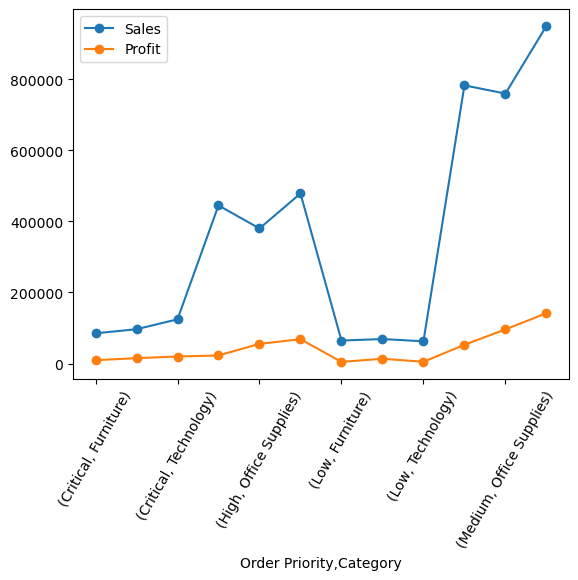

In [61]:
c1.plot(kind='line',marker='o')
plt.xticks(rotation=60)
plt.show()

#### Q2) Find Segment and Order Priority and wise mean of Profit and mean of Sales for the month of December and depict in on a clustered bar chart

In [62]:
c2 = df[df['Month']==12].groupby(['Segment','Order Priority'])[['Profit','Sales']].mean()
c2

Profit       Sales
Segment     Order Priority                       
Consumer    Critical        31.498554  257.066859
            High            23.937476  264.474709
            Low             26.709415  202.300394
            Medium          33.769130  264.739044
Corporate   Critical        40.750820  261.919750
            High            17.192785  219.531257
            Low             29.033422  204.060205
            Medium          27.469863  241.818547
Home Office Critical        55.128831  314.256471
            High            16.460995  207.233081
            Low             54.493600  266.589644
            Medium          33.375318  243.973392

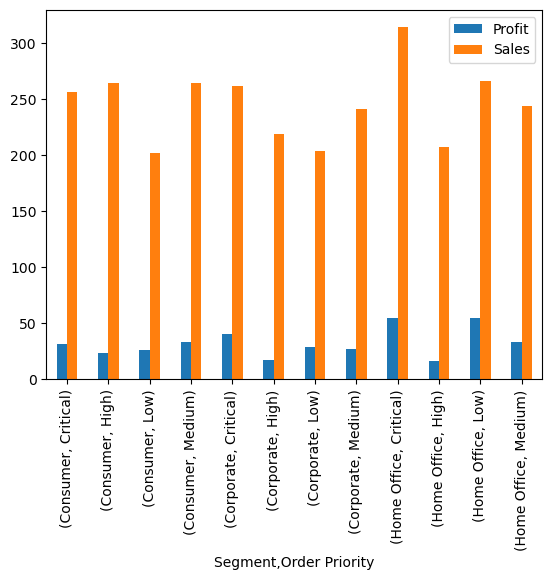

In [63]:
c2.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

#### Q3) For the Category Technology or Furniture and for the Quarter 4, depict Quantity vs segment on a boxplot

In [64]:
df['Qtr'].value_counts()

4    15661
3    13523
2    12329
1     9777
Name: Qtr, dtype: int64

In [65]:
c5 = df[(df['Category'].isin(['Technology','Furniture'])) & (df['Qtr']==4)]
c5.shape

(6205, 27)

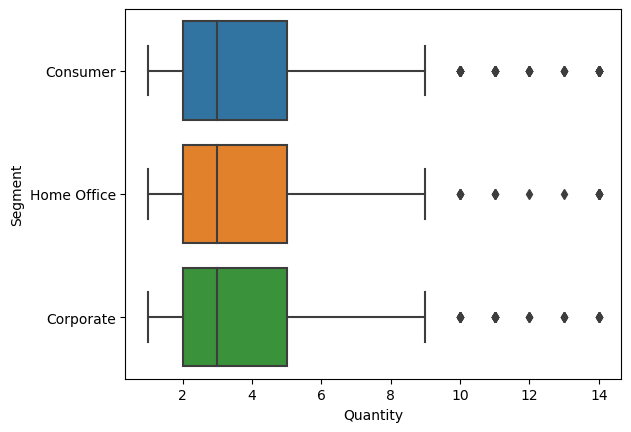

In [66]:
sns.boxplot(x=c5['Quantity'],y=c5['Segment'])
plt.show()

Infrences:
We have outliers in data i.e. for the Category Technology or Furniture and for the Quarter 4

#### 6) EDA using Subplots

#### Q1) For 'Consumer' Segment and 'Medium' Order Priority, find Ship Mode wise mean of Sales and Profit

Create a 2x2 subplot depicting
a) Bar Chart and Line chart for Ship Mode vs Sales
b) Bar Chart and Line chart for Ship Mode vs Profit
c) Scatter Chart for Profit vs Sales
d) Line Chart for Ship Mode vs Profit and Ship Mode vs Sales

In [67]:
d1 = df[(df['Segment']=='Consumer') & (df['Order Priority']=='Medium')].groupby(['Ship Mode'])[['Sales','Profit']].mean()
d1

,Sales,Profit
Ship Mode,,
First Class,250.842119,33.145865
Same Day,247.102313,38.281658
Second Class,236.487664,26.300652
Standard Class,245.587219,29.234086


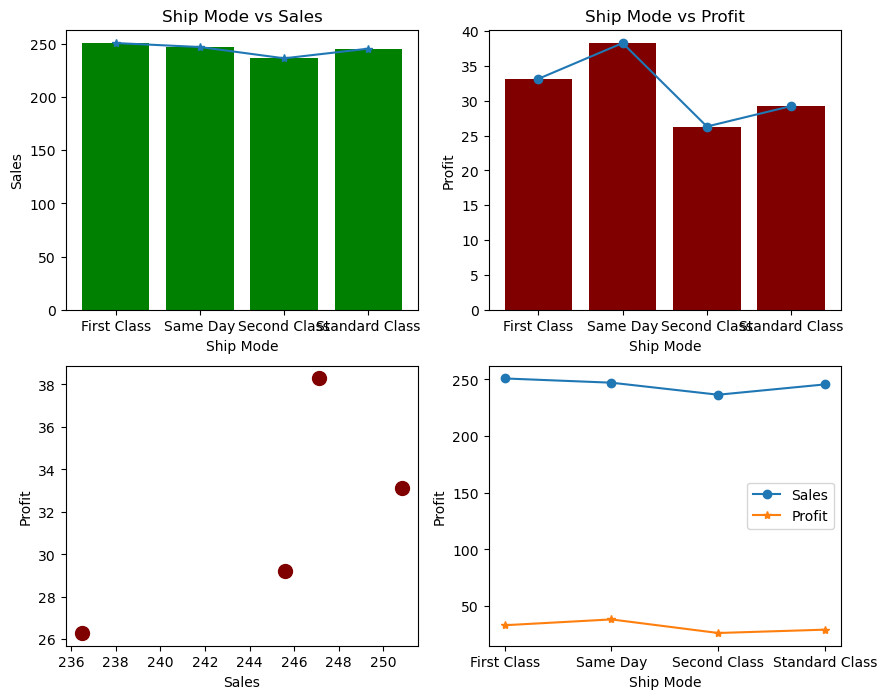

In [68]:
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(2,2,figsize=(10,8))

ax1.bar(d1.index,d1['Sales'],color='green')  # Bar chart for Sales vs Ship Mode
ax1.plot(d1.index,d1['Sales'],marker='*')    # Line chart for Sales vs Ship Mode 
ax1.set_xlabel('Ship Mode')
ax1.set_ylabel('Sales')
ax1.set_title('Ship Mode vs Sales')

ax2.bar(d1.index,d1['Profit'],color='maroon')  # Bar chart for Profit vs Ship Mode
ax2.plot(d1.index,d1['Profit'],marker="o")     # Line chart for Profit vs Ship Mode 
ax2.set_xlabel('Ship Mode')
ax2.set_ylabel('Profit')
ax2.set_title('Ship Mode vs Profit')

ax3.scatter(d1['Sales'],d1['Profit'],marker='o',s=100,color='maroon')
ax3.set_xlabel('Sales')
ax3.set_ylabel('Profit')


ax4.plot(d1.index,d1['Sales'],marker="o",label="Sales")      # Line chart for Sales vs Ship Mode 
ax4.plot(d1.index,d1['Profit'],marker="*",label="Profit")   # Line chart for Profit vs Ship Mode 
ax4.legend()
ax4.set_xlabel('Ship Mode')
ax4.set_ylabel('Profit')

plt.show()